<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/pandas_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [ ]:
movies = pd.read_csv('./movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
tags = pd.read_csv('./tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [ ]:
ratings = pd.read_csv('./ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

<ipython-input-6-fe4c35a547fc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ratings = pd.read_csv('./ratings.csv', sep=',', parse_dates=['timestamp'])


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [ ]:
del ratings['timestamp']
del tags['timestamp']

In [ ]:
row_0 = tags.iloc[0]
print(type(row_0))
print(row_0)

<class 'pandas.core.series.Series'>
userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [ ]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [ ]:
row_0['userId']

18

In [ ]:
'rating' in row_0

False

In [ ]:
row_0.name

0

In [ ]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

In [ ]:
ratings.describe()

,userId,movieId,rating
count,1.647069e+06,1.647069e+06,1.647068e+06
mean,5.569482e+03,8.638519e+03,3.519309e+00
std,3.220752e+03,1.908065e+04,1.052163e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,2.807000e+03,9.040000e+02,3.000000e+00
50%,5.486000e+03,2.150000e+03,3.500000e+00
75%,8.416000e+03,4.638000e+03,4.000000e+00
max,1.113300e+04,1.307680e+05,5.000000e+00


In [ ]:
ratings.mode()

,userId,movieId,rating
0,8405,296,4.0


In [ ]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000777,-0.006697
movieId,-0.000777,1.000000,0.002526
rating,-0.006697,0.002526,1.000000


In [ ]:
filter_2 = ratings.loc[ratings['rating'] > 0]

In [ ]:
filter_2.groupby("movieId").mean()

,userId,rating
movieId,,
1,5535.635182,3.940405
2,5543.110988,3.241676
3,5498.048031,3.171470
4,5875.544248,2.991150
5,5455.702463,3.128571
...,...,...
130490,2910.000000,2.250000
130496,7434.000000,1.500000
130512,8963.000000,3.500000


In [ ]:
movies.shape

(27278, 3)

In [ ]:
movies.isnull().any()

,0
movieId,False
title,False
genres,False


In [ ]:
ratings.shape

(1647069, 3)

In [ ]:
ratings.isnull().any()

,0
userId,False
movieId,False
rating,True


In [ ]:
ratings = ratings.dropna()
ratings.isnull().any()

,0
userId,False
movieId,False
rating,False


In [ ]:
tags.shape

(465564, 3)

In [ ]:
tags.isnull().any()

,0
userId,False
movieId,False
tag,True


In [ ]:
tags = tags.dropna()

In [ ]:
tags.isnull().any()

,0
userId,False
movieId,False
tag,False


In [ ]:
tags.shape

(465548, 3)

In [ ]:
import matplotlib.pylab as plt

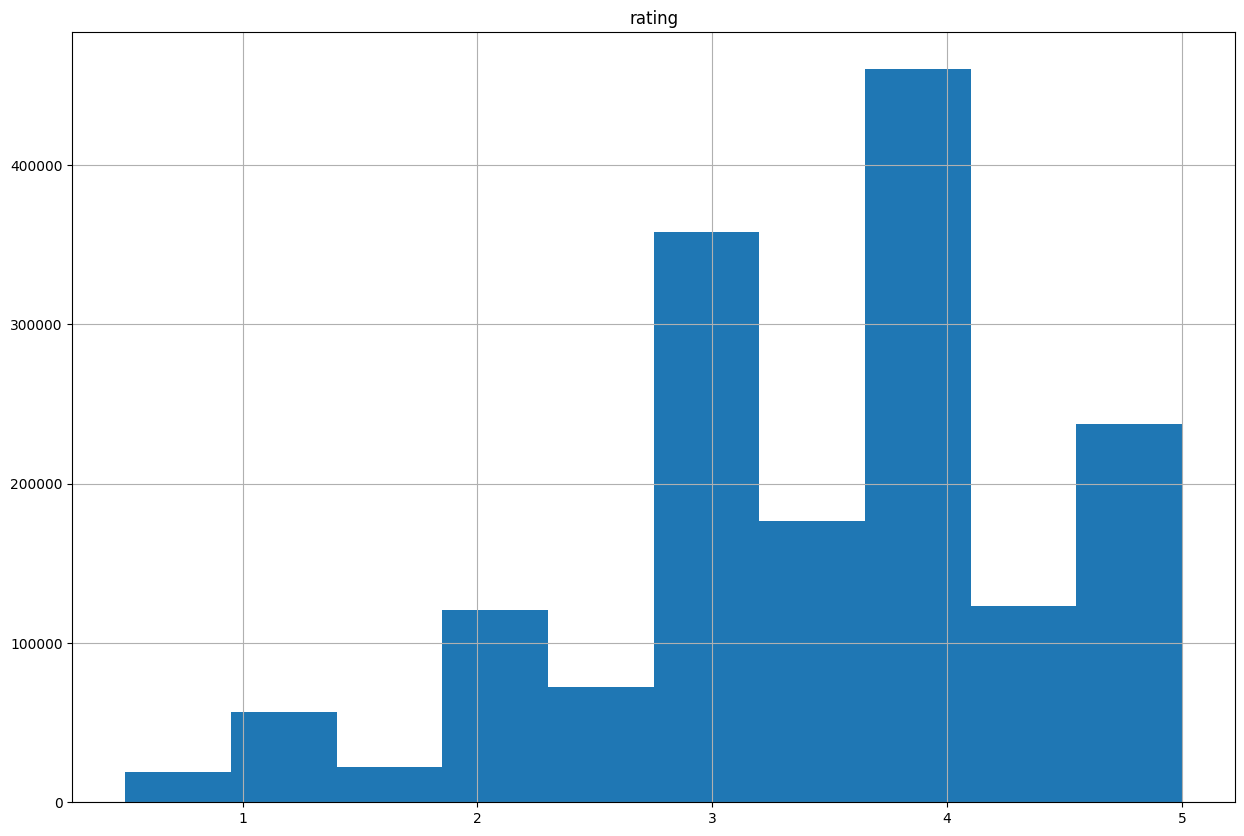

In [ ]:
ratings.hist(column='rating', figsize=(15,10),bins=10)
plt.show()

In [ ]:
tags['tag'].head()

,tag
0,Mark Waters
1,dark hero
2,dark hero
3,noir thriller
4,dark hero


In [ ]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings[-10:]

,userId,movieId,rating
1647058,11133,1293,4.0
1647059,11133,1299,5.0
1647060,11133,1301,5.0
1647061,11133,1304,4.0
1647062,11133,1306,4.0
1647063,11133,1356,4.0
1647064,11133,1371,3.0
1647065,11133,1374,4.0
1647066,11133,1375,3.0
1647067,11133,1376,5.0


In [ ]:
ratings.tail(10)

,userId,movieId,rating
1647058,11133,1293,4.0
1647059,11133,1299,5.0
1647060,11133,1301,5.0
1647061,11133,1304,4.0
1647062,11133,1306,4.0
1647063,11133,1356,4.0
1647064,11133,1371,3.0
1647065,11133,1374,4.0
1647066,11133,1375,3.0
1647067,11133,1376,5.0


<Axes: xlabel='tag'>

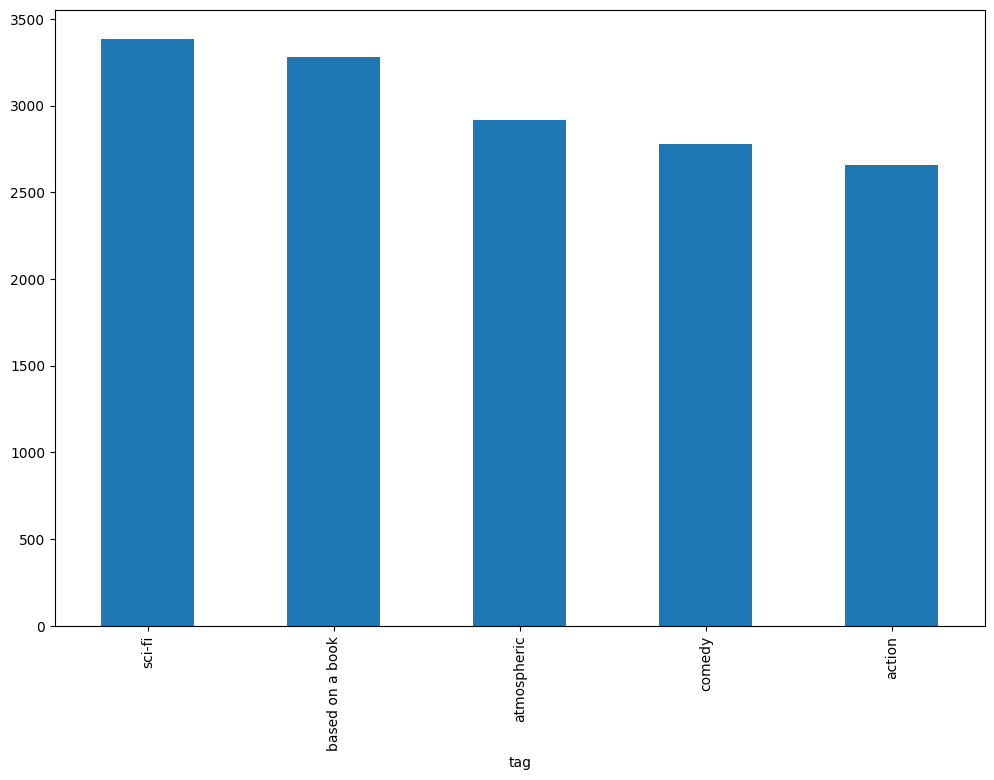

In [ ]:
tag_counts = tags['tag'].value_counts()
tag_counts.head().plot(kind='bar', figsize=(12,8))

<Axes: xlabel='tag'>

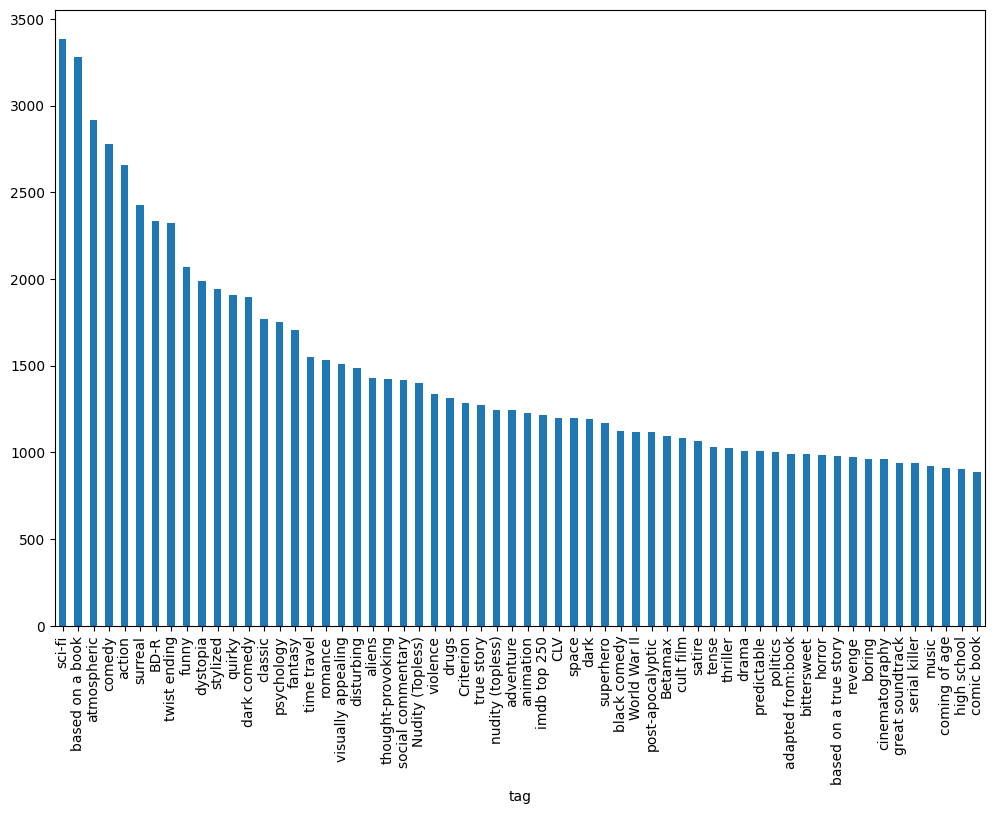

In [ ]:
tag_counts.head(60).plot(kind='bar', figsize=(12,8))

<Axes: xlabel='tag'>

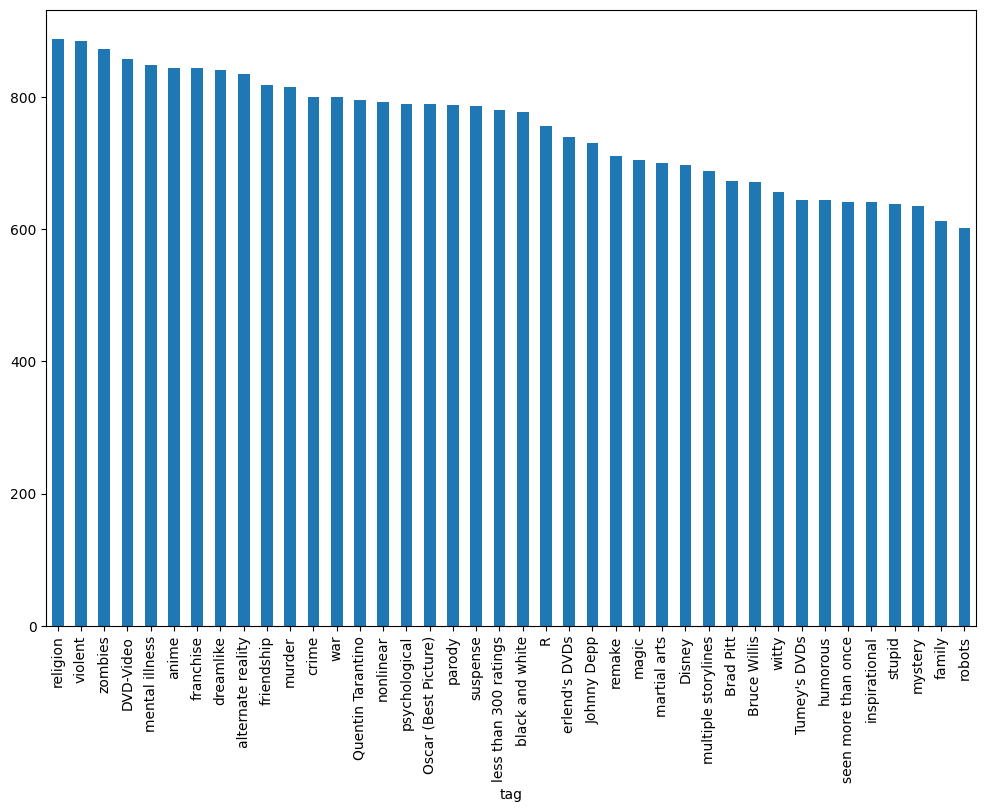

In [ ]:
tag_counts[60:100].plot(kind='bar', figsize=(12,8))

In [ ]:
is_highly_rated = ratings['rating'] >= 4.0
ratings[is_highly_rated].head()

,userId,movieId,rating
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0
10,1,293,4.0


In [ ]:
is_animation = movies['genres'].str.contains('Animation')
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [ ]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,19174
1.0,56971
1.5,22352
2.0,120902
2.5,72425
3.0,357965
3.5,176505
4.0,460254
4.5,123381


In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean() # We are not in terested in the user that voted for it
average_rating.head()

,rating
movieId,
1,3.940405
2,3.241676
3,3.171470
4,2.991150
5,3.128571


In [ ]:
sorted_average_rating=average_rating.sort_values(by="rating",ascending=False)
sorted_average_rating.head()

,rating
movieId,
93132,5.0
97390,5.0
106927,5.0
27867,5.0
70948,5.0


In [ ]:
average_rating.loc[average_rating.rating==5.0].head()

,rating
movieId,
1706,5.0
1764,5.0
1819,5.0
6015,5.0
6634,5.0


In [ ]:
id_movie=average_rating.loc[average_rating.rating==5.0].index

In [ ]:
movies.loc[movies.movieId.isin(id_movie)].head()

,movieId,title,genres
1647,1706,Tar (1996),Drama
1696,1764,Tainted (1998),Comedy|Thriller
1740,1819,Storefront Hitchcock (1997),Documentary|Musical
5916,6015,Big Shot's Funeral (Da Wan) (2001),Comedy
6524,6634,Rowing with the Wind (Remando al viento) (1988),Drama|Romance


In [ ]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
t = pd.merge(movies,tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


In [ ]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.940405
1,2,3.241676
2,3,3.171470
3,4,2.991150
4,5,3.128571


In [ ]:
box_office = pd.merge(movies,avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
16057,130490,Insurgent (2015),Action|Romance|Sci-Fi,2.25
16058,130496,Big Game (2015),Action|Adventure,1.50
16059,130512,Hippocrates (2014),Comedy|Drama,3.50
16060,130642,Backcountry (2014),Drama|Horror|Thriller,3.00
16061,130768,Chain of Command (2000),Action|Thriller,2.50


In [ ]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated].tail()

,movieId,title,genres,rating
16039,128991,Johnny Express (2014),Animation|Comedy|Sci-Fi,4.5
16048,129659,McFarland USA (2015),Drama,4.0
16050,129822,Bikes vs Cars (2015),Documentary,4.0
16055,130219,The Dark Knight (2011),Action|Crime|Drama|Thriller,4.5
16056,130462,The Boy (2015),(no genres listed),4.0


In [ ]:
is_comedy = box_office['genres'].str.contains('Comedy')
box_office[is_comedy].head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.940405
2,3,Grumpier Old Men (1995),Comedy|Romance,3.171470
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.991150
4,5,Father of the Bride Part II (1995),Comedy,3.128571
6,7,Sabrina (1995),Comedy|Romance,3.365421


In [ ]:
box_office[is_comedy & is_highly_rated].head()

,movieId,title,genres,rating
228,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,4.041082
292,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.160187
351,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048301
600,608,Fargo (1996),Comedy|Crime|Drama|Thriller,4.090436
701,720,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy,4.055219


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movie_genres = movies['genres'].str.split('|', expand=True)
movie_genres.head(10)

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [ ]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [ ]:
tags.head(5)

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [ ]:
tags = pd.read_csv('./tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [ ]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [ ]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18


In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'
selected_rows = tags[greater_than_t]
print(tags.shape, selected_rows.shape)

(465564, 5) (12130, 5)


In [ ]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
16057,130490,2.25
16058,130496,1.50
16059,130512,3.50
16060,130642,3.00
16061,130768,2.50


In [ ]:
joined = pd.merge(movies,average_rating, on='movieId', how='inner')
joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.940405
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.241676
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.171470
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.991150
4,5,Father of the Bride Part II (1995),Comedy,1995,3.128571


In [ ]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average.head(10)

,year,rating
0,1898,4.000000
1,1900,3.250000
2,1902,3.647059
3,1903,4.250000
4,1909,1.500000
5,1910,3.000000
6,1912,3.000000
7,1913,4.500000
8,1914,1.416667
9,1915,3.416667


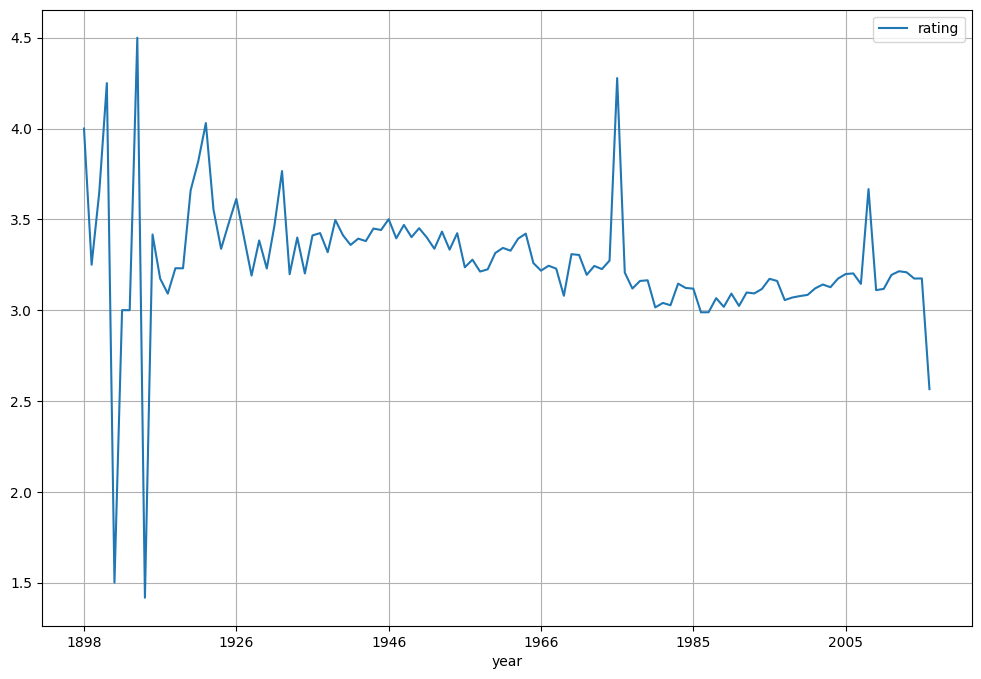

In [ ]:
yearly_average.plot(x='year', y='rating', figsize=(12,8), grid=True)
plt.show()